© 2025 Yegor Tkachenko. 

Python, Deep Learning, and LLMs: A Crash Course for Complete Beginners.

Selected code from *Chapter 4: Regression models*.

Version: 2025-09-03. https://python2llms.org. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# OPTIONAL: settings to make figures look nicer
# see documentation: https://matplotlib.org/stable/api/rcsetup_api.html
import matplotlib as mpl
from cycler import cycler # color cycling

colors = mpl.color_sequences["petroff10"] # https://arxiv.org/abs/2107.02270
plt.rcParams.update({
    'figure.dpi' : 300,
    'savefig.dpi' : 300,
    'text.usetex' : True, # requires latex installed
    'font.size': 11,
    'axes.labelsize': 11,
    'legend.fontsize': 11,
    'axes.prop_cycle' : cycler('color', colors),
    'figure.autolayout': True,
    'savefig.bbox': 'tight',
})

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

# define the convex quadratic function (MSE): 
# f(b0,b1) = 0.5(2 - b0 - b1*0.5)^2 + 0.5(-1 - b0 - b1*(-1.5))^2
def convex_quadratic(b0, b1):
    return 0.5*(2 - b0 - b1*0.5)**2 + 0.5*(-1 - b0 - b1*(-1.5))**2

# define the Himmelblau's function: 
# f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# create a meshgrid
x = np.linspace(-6, 6, 200)
y = np.linspace(-6, 6, 200)
X, Y = np.meshgrid(x, y)

# compute function values
Z1 = convex_quadratic(X, Y)
Z2 = himmelblau(X, Y)

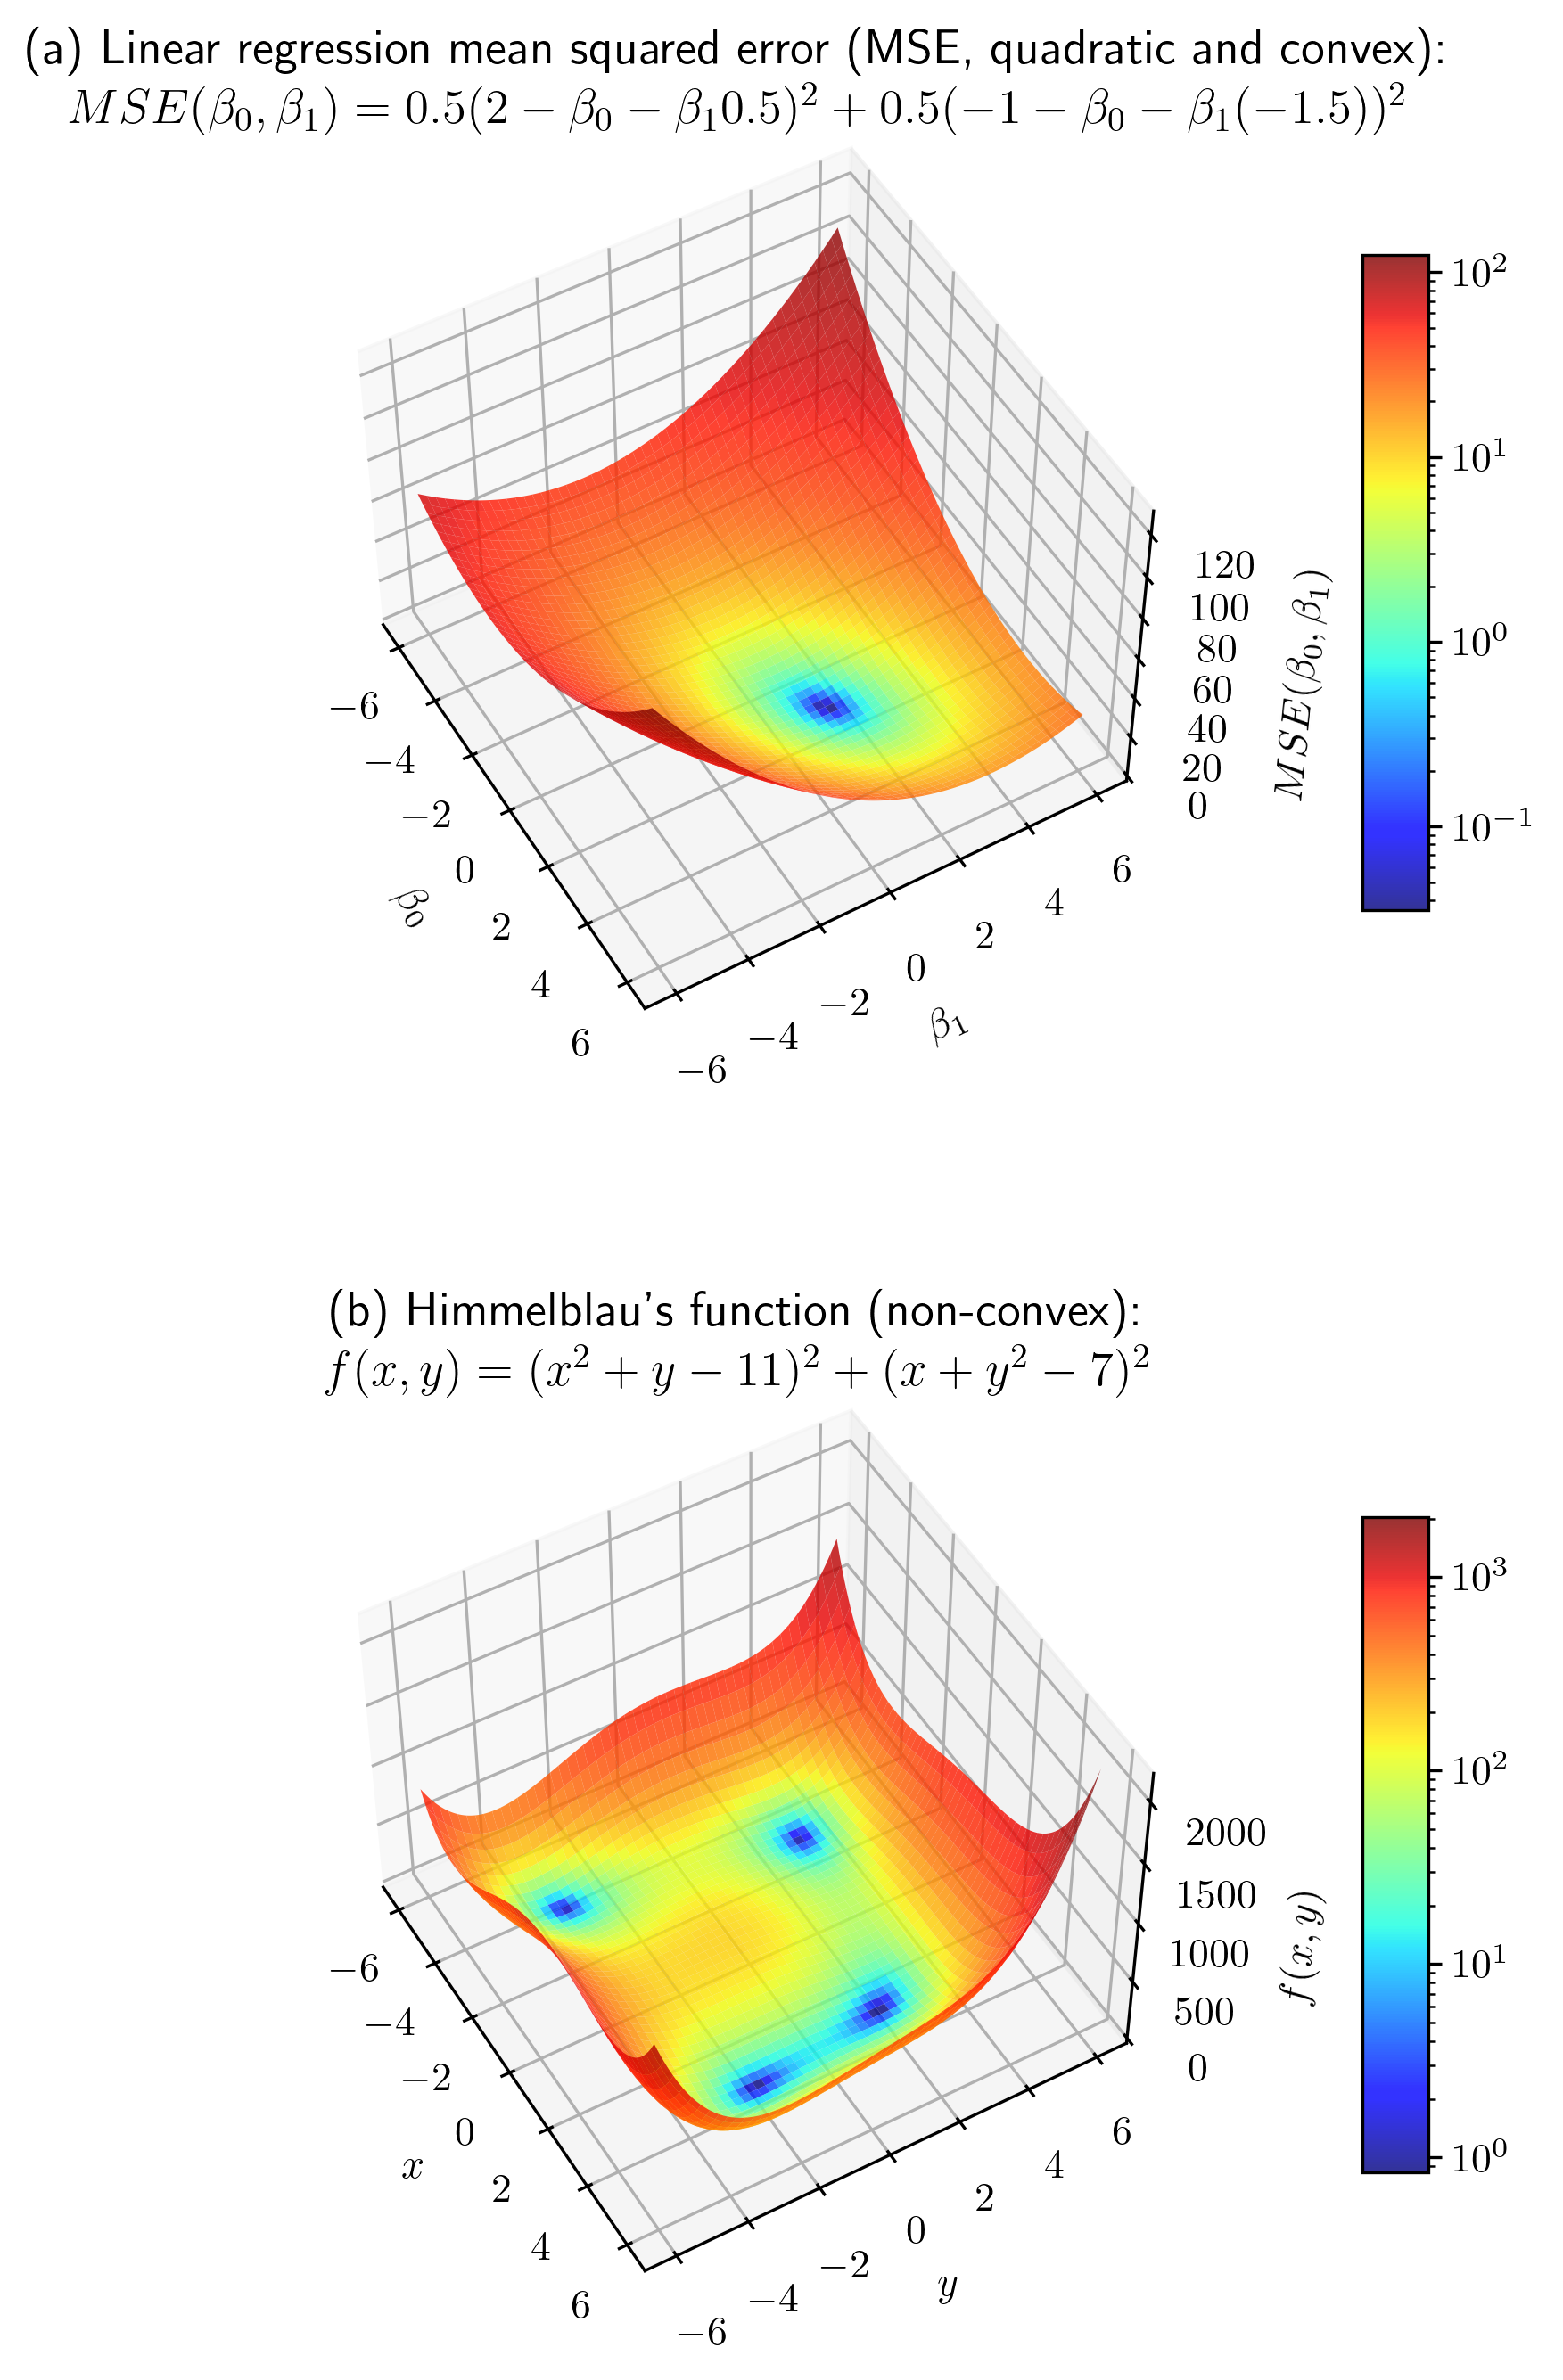

In [4]:
# create the plots
fig, axs = plt.subplots(2, 1, figsize=(5, 10), subplot_kw=dict(projection='3d'))

# quadratic plot
surf1 = axs[0].plot_surface(X, Y, Z1, alpha=0.8, cmap='jet', norm=LogNorm())
axs[0].set_title("(a) Linear regression mean squared error (MSE, quadratic and convex):\n"
  r"$MSE(\beta_0,\beta_1) = 0.5(2 - \beta_0 - \beta_10.5)^2 + 0.5(-1 - \beta_0 - \beta_1(-1.5))^2$")
axs[0].set_xlabel(r"$\beta_0$")
axs[0].set_ylabel(r"$\beta_1$")
axs[0].set_zlabel(r"$MSE(\beta_0,\beta_1)$")
fig.colorbar(surf1, ax=axs[0], shrink=0.5, aspect=10, pad=0.15)
axs[0].view_init(elev=50, azim=-30)

# Himmelblau's function plot
surf2 = axs[1].plot_surface(X, Y, Z2, alpha=0.8, cmap='jet', norm=LogNorm())
axs[1].set_title("(b) Himmelblau's function (non-convex):\n"
  "$f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("$y$")
axs[1].set_zlabel("$f(x,y)$")
fig.colorbar(surf2, ax=axs[1], shrink=0.5, aspect=10, pad=0.15)
axs[1].view_init(elev=50, azim=-30)

# show figure
plt.show()

In [5]:
import pandas as pd
data = pd.read_csv('diamonds.csv')
# alternatively, read directly from url
# data = pd.read_csv(("https://raw.githubusercontent.com/"
#   "tidyverse/ggplot2/refs/heads/main/data-raw/diamonds.csv"))
data.iloc[:,:7].head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


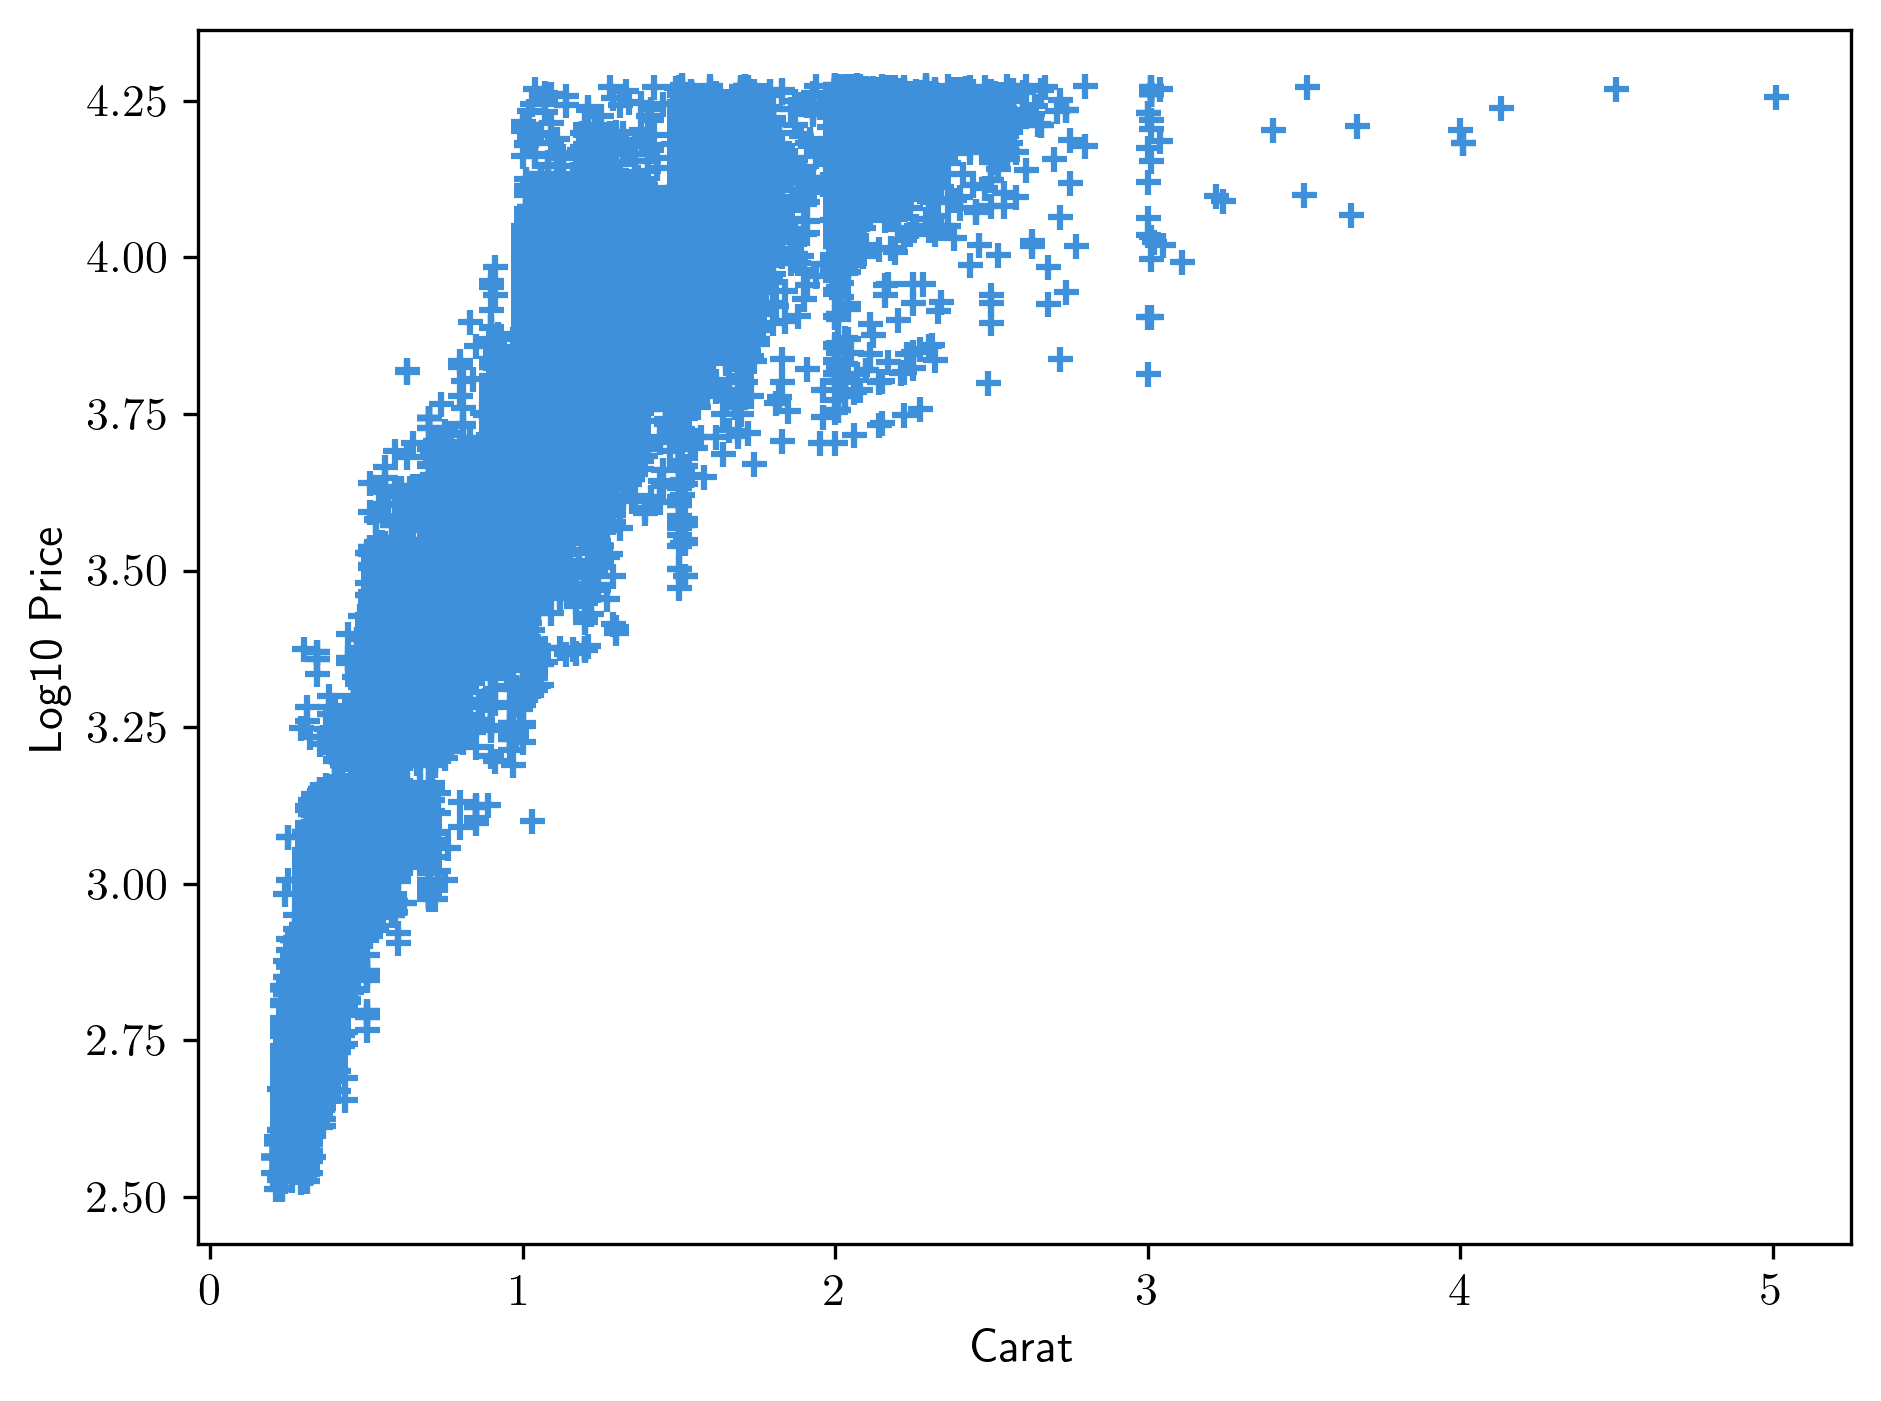

In [6]:
plt.scatter(data['carat'], np.log10(data['price']), marker="+")
plt.xlabel('Carat')
plt.ylabel('Log10 Price')
plt.show()
plt.close()

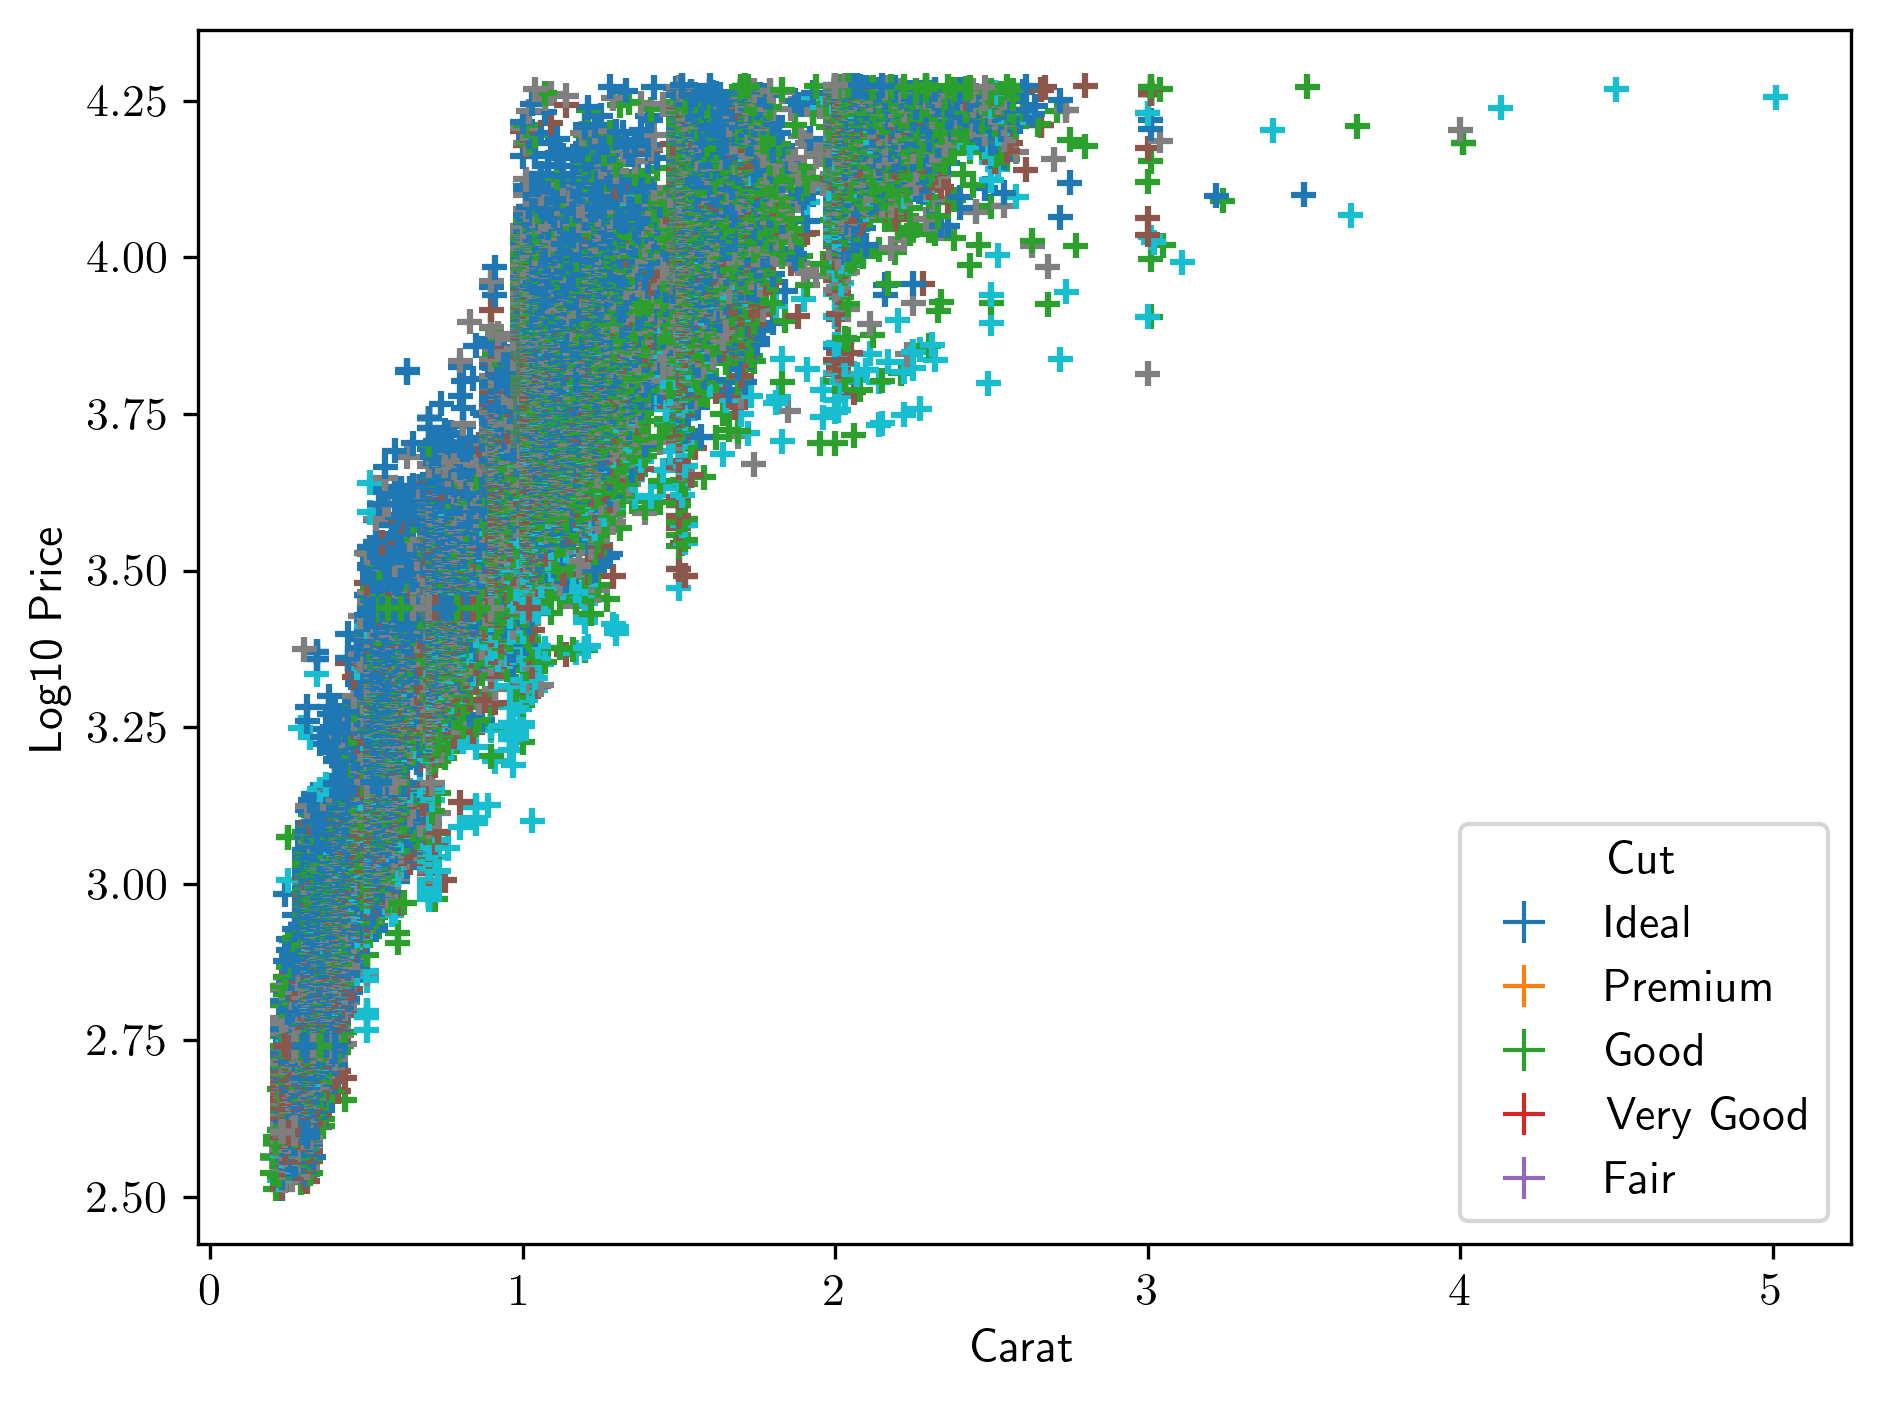

In [7]:
# color scatter plot by cut
labels, levels = pd.factorize(data['cut'])
plt.scatter(data['carat'], np.log10(data['price']), marker="+", c=labels, cmap='tab10')
plt.xlabel('Carat')
plt.ylabel('Log10 Price')
handles = [plt.Line2D([0], [0], marker='+', linestyle='None', color=plt.cm.tab10(i), markersize=10) for i in range(len(levels))]
plt.legend(handles, levels, title='Cut', loc='lower right')
plt.show()
plt.close()

In [8]:
data['Intercept'] = 1.
data['log10(price)'] = np.log10(data['price'])

X = data[ ['Intercept', 'carat'] ]  # input variables + intercept term (vector of ones)
y = data['log10(price)']  # output variable that we predict

In [9]:
def ols(X, y):
    XtX = X.T.dot(X)
    XtXinv = np.linalg.inv(XtX)
    Xty = X.T.dot(y)
    beta = XtXinv.dot(Xty)
    return beta

In [10]:
beta_a = ols(X,y)
print('beta:', beta_a)

beta: [2.69914932 0.85545464]


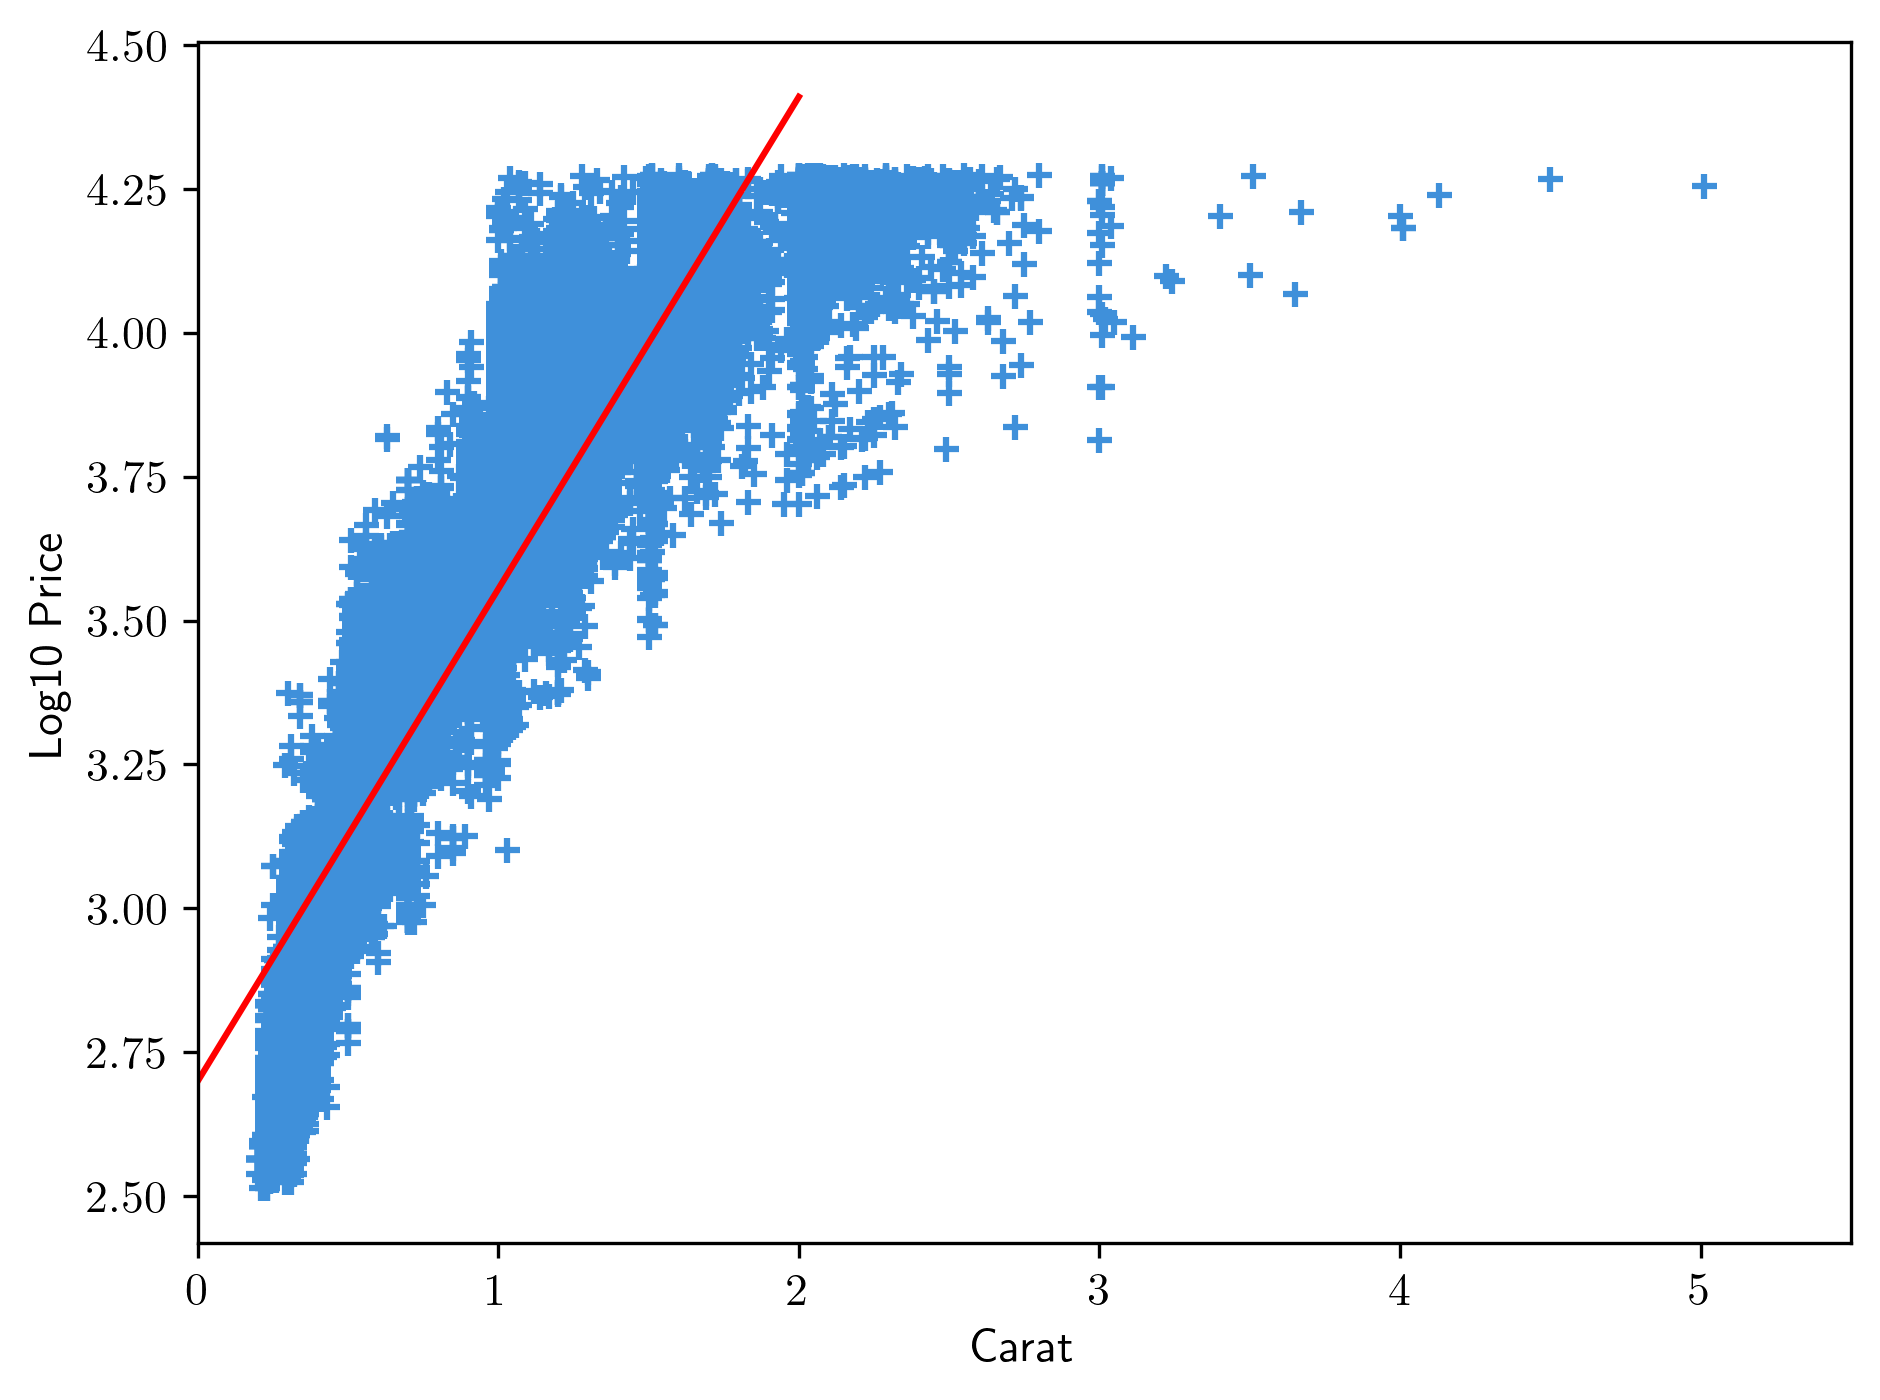

In [11]:
#| label: fig-regression-line-fit
#| fig-cap: Fitted regression line

plt.scatter(data['carat'], np.log10(data['price']), marker="+")
plt.xlabel('Carat')
plt.ylabel('Log10 Price')

x1 = np.linspace(0,2,500)
y1 = beta_a[0] + beta_a[1]*x1
plt.plot(x1, y1, "-r")
plt.xlim(0,5.5)
plt.show()
plt.close()

In [12]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
# predictions = model.predict(X) 
model.summary() # identical coefficients to the analytical formula
# print(model.get_robustcov_results('HC3').summary()) # heteroscedasticity robust errors

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log10(price)   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                 2.981e+05
Date:                Sat, 13 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:18:15   Log-Likelihood:                 18259.
No. Observations:               53940   AIC:                        -3.651e+04
Df Residuals:                   53938   BIC:                        -3.650e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6991      0.001   1856.116      0.000       2.696       2.702
carat          0.8555      0.002    545.978      0.000       0.852       0.859
==============================================================================
Omnibus:                    10805.529   Durbin-Watson:                   0.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71366.235
Skew:                          -0.804   Prob(JB):                         0.00
Kurtosis:                       8.401   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
class LinearRegression:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def ols(self, X, y):
        XtX = X.T.dot(X)
        XtXinv = np.linalg.inv(XtX)
        Xty = X.T.dot(y)
        beta = XtXinv.dot(Xty)
        return beta

    def fit(self):
        self.beta = self.ols(self.X, self.y)
        return self

    def predict(self, X_new):
        return X_new.dot(self.beta)
    
    def mse(self, X, y):
        return np.mean((y-X.dot(self.beta))**2)

    def r2_score(self, X, y):   
        y_pred = self.predict(X)
        # output variance - "overall" variance
        y_var = np.mean((y - np.mean(y))**2)
        # MSE - leftover unexplained variance
        mse = np.mean((y - y_pred)**2)
        # R^2 - explained variance proportion    
        r2 = 1.0 - mse / y_var               
        return r2

In [14]:
reg = LinearRegression(X, y).fit()

print("Coefficients:", reg.beta)
print("MSE:", reg.mse(X,y))
print("R^2 Score:", reg.r2_score(X, y))

Coefficients: [2.69914932 0.85545464]
MSE: 0.02975140412268576
R^2 Score: 0.8467801830517974


In [15]:
import cvxpy as cp

# initialize parameter vector of length two
beta = cp.Variable(2)

# objective (minimize mean squared error)
objective = cp.Minimize(cp.sum_squares(y.values - X.values @ beta) / X.shape[0])

# solve the problem
problem = cp.Problem(objective)
problem.solve()

# extract optimal value
beta_optim = beta.value

print('beta:', beta_optim)
print("MSE:", problem.value)

beta: [2.69914931 0.85545465]
MSE: 0.029751404122685798


In [16]:
# non-negativity constraint
constraints = [beta[0] <= 2.5]

# solve the constrained problem
problem = cp.Problem(objective, constraints)
problem.solve()

# extract optimal value
beta_optim = beta.value

print('beta (constrained):', beta_optim)
print("MSE (constrained):", problem.value)

beta (constrained): [2.5       1.0399345]
MSE (constrained): 0.0400963183123091


In [17]:
# L-BFGS-B optimizer implementation
from scipy.optimize import minimize  

# initial parameter guess
beta_init = np.ones(2)

# objective function to minimize
mse = lambda beta: np.mean((y-X.dot(beta))**2)

# optimization
res = minimize(mse, beta_init, method="L-BFGS-B")

# optimal parameter
beta_optim = res.x

print('beta:', beta_optim)

beta: [2.69914933 0.85545449]


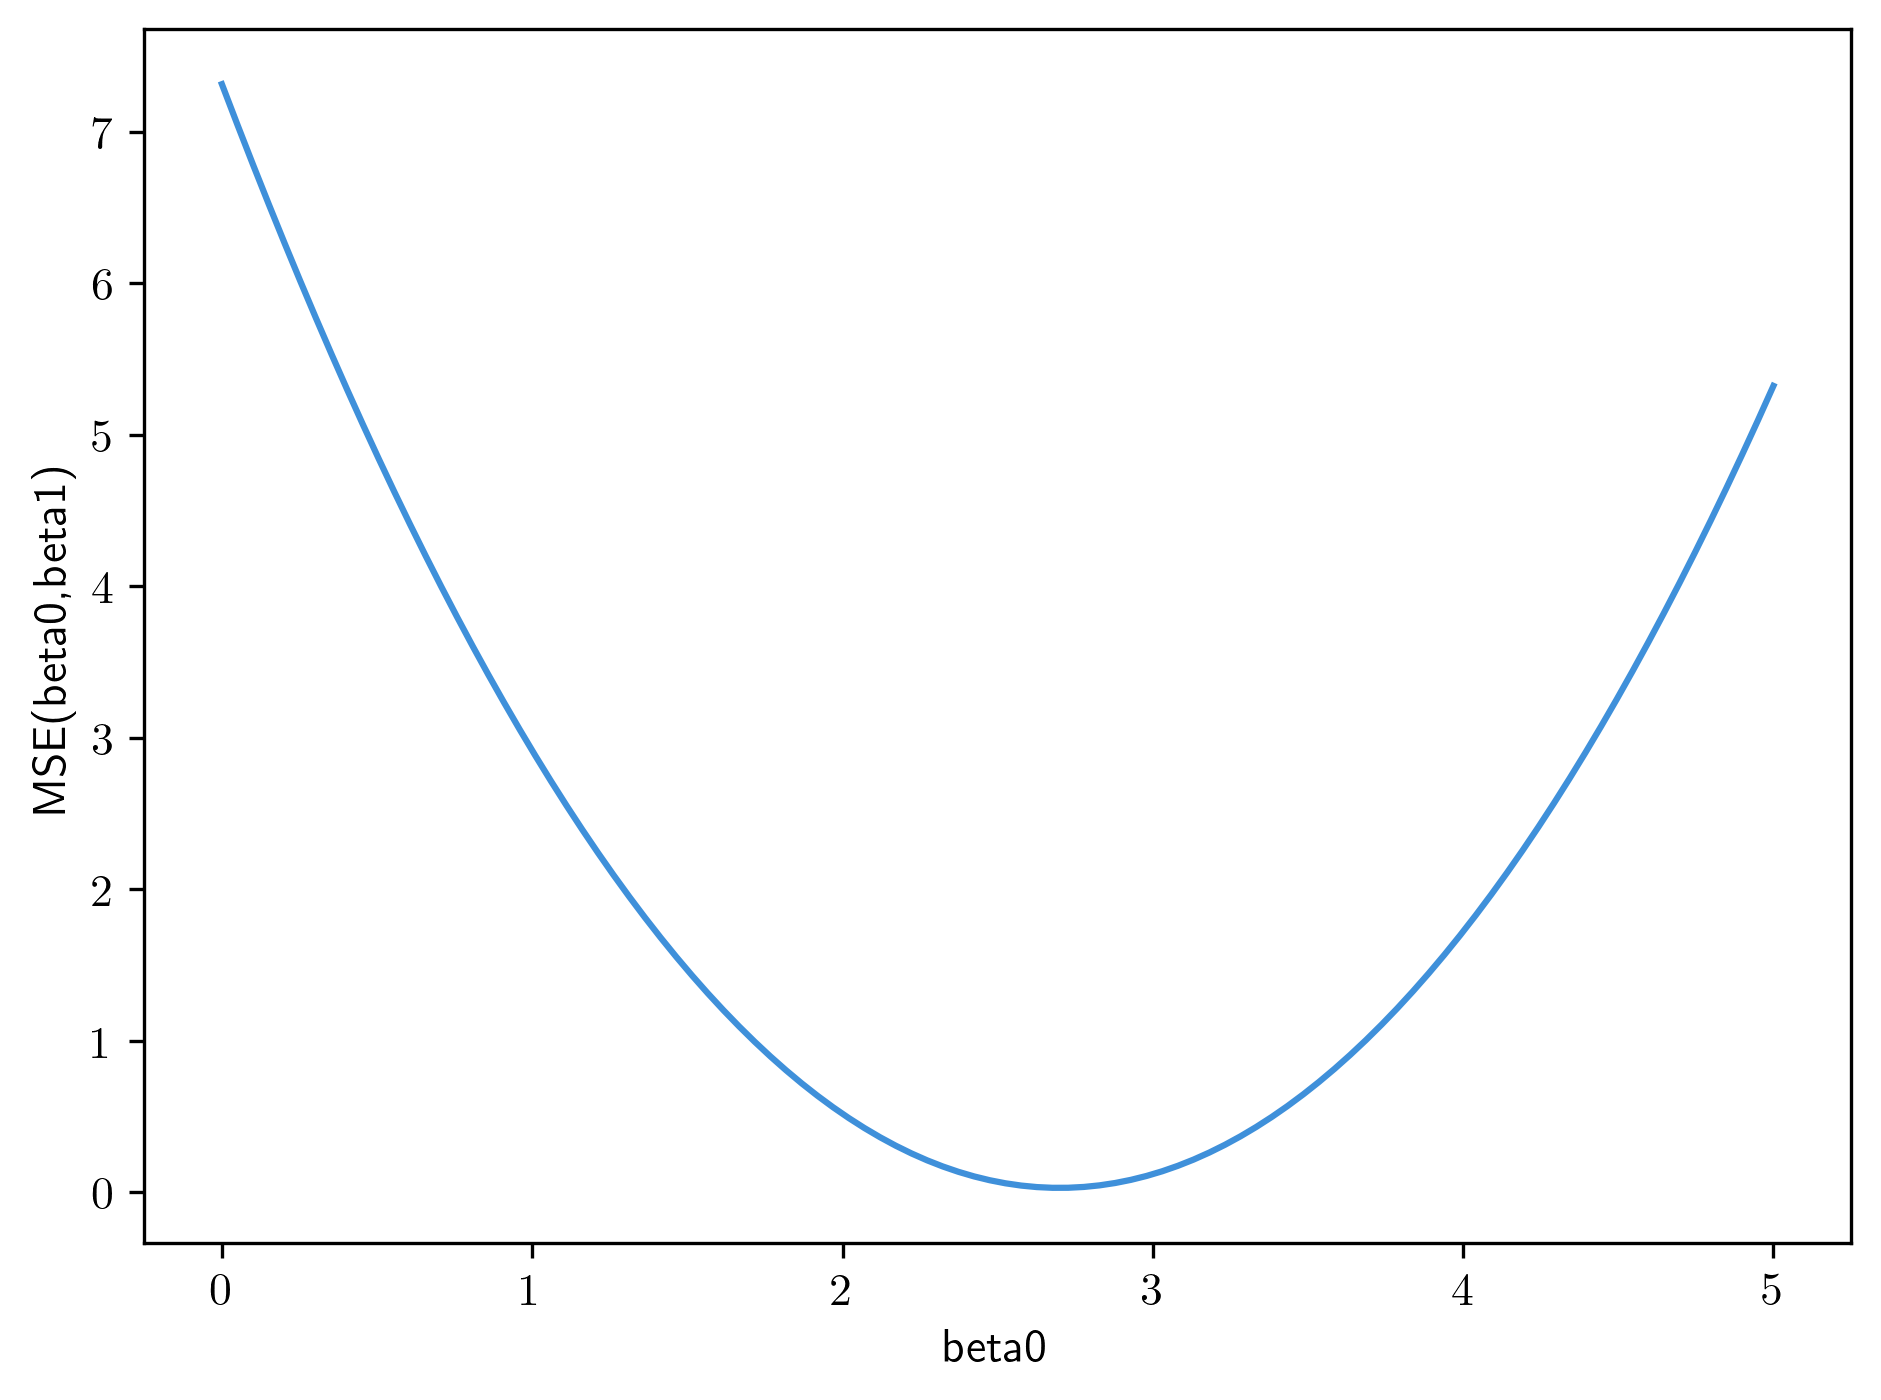

In [18]:
beta_temp = np.copy(beta_a)
b0 = np.linspace(0,5,100)
mse_curve = []
for b0i in b0:
    beta_temp[0] = b0i
    mse_curve.append(mse(beta_temp))
plt.plot(b0,mse_curve)
plt.xlabel('beta0')
plt.ylabel('MSE(beta0,beta1)')
plt.show()

In [19]:
beta_g = np.ones(2)
gamma = 0.01
mse_loss_hist = []
params = np.zeros((10000, 2))
for i in range(10000):
    grd = X.T.dot(X.dot(beta_g) - y) / X.shape[0]
    beta_g = beta_g - gamma * grd
    mse_loss_hist.append(mse(beta_g))
    params[i] = beta_g
print('Final beta:', beta_g.values)

Final beta: [2.69914737 0.85545677]


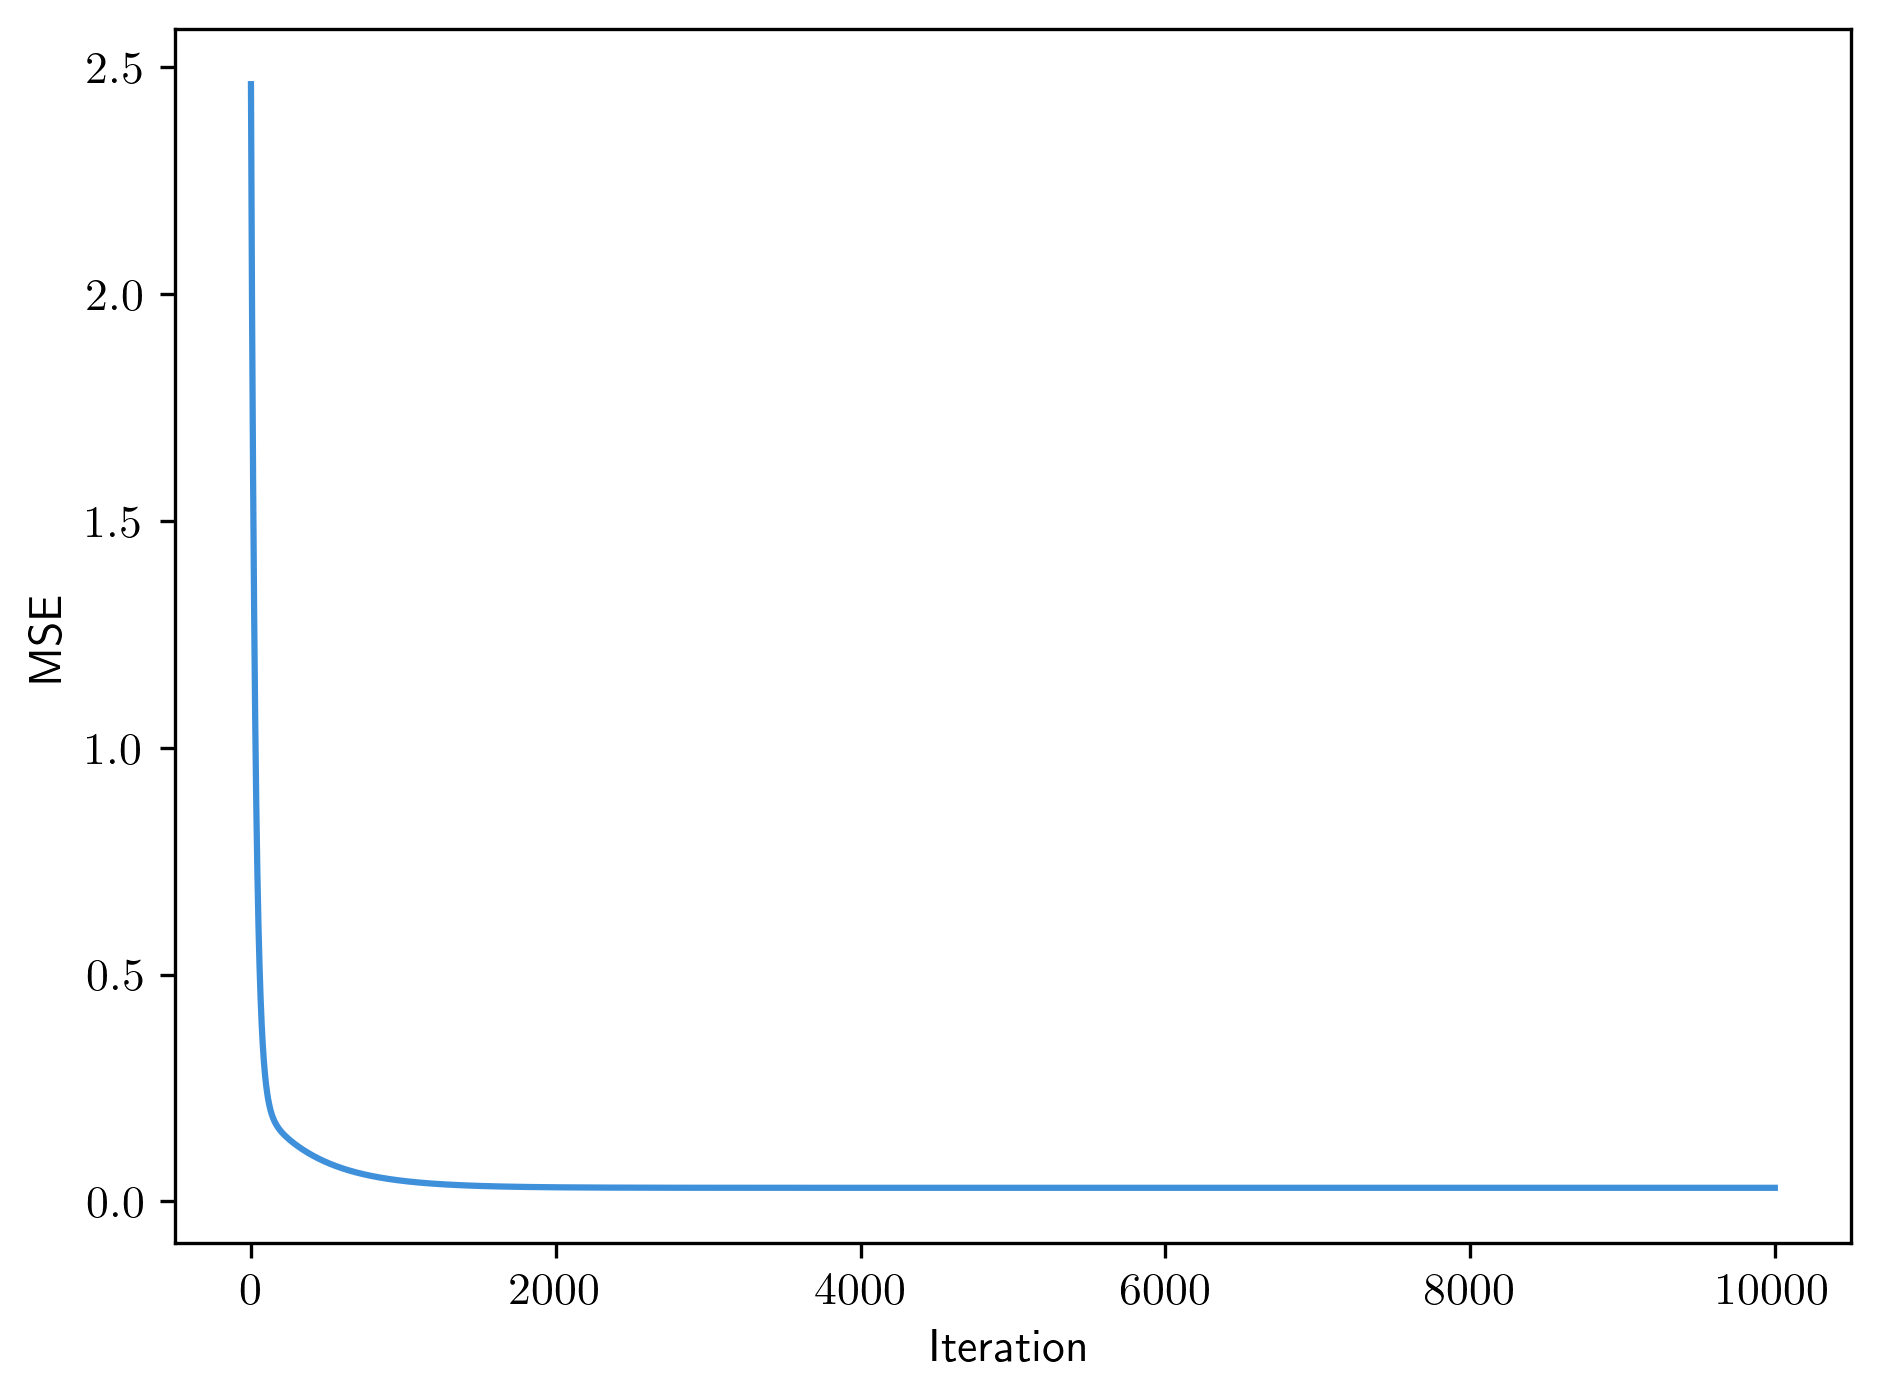

In [20]:
plt.plot(mse_loss_hist)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

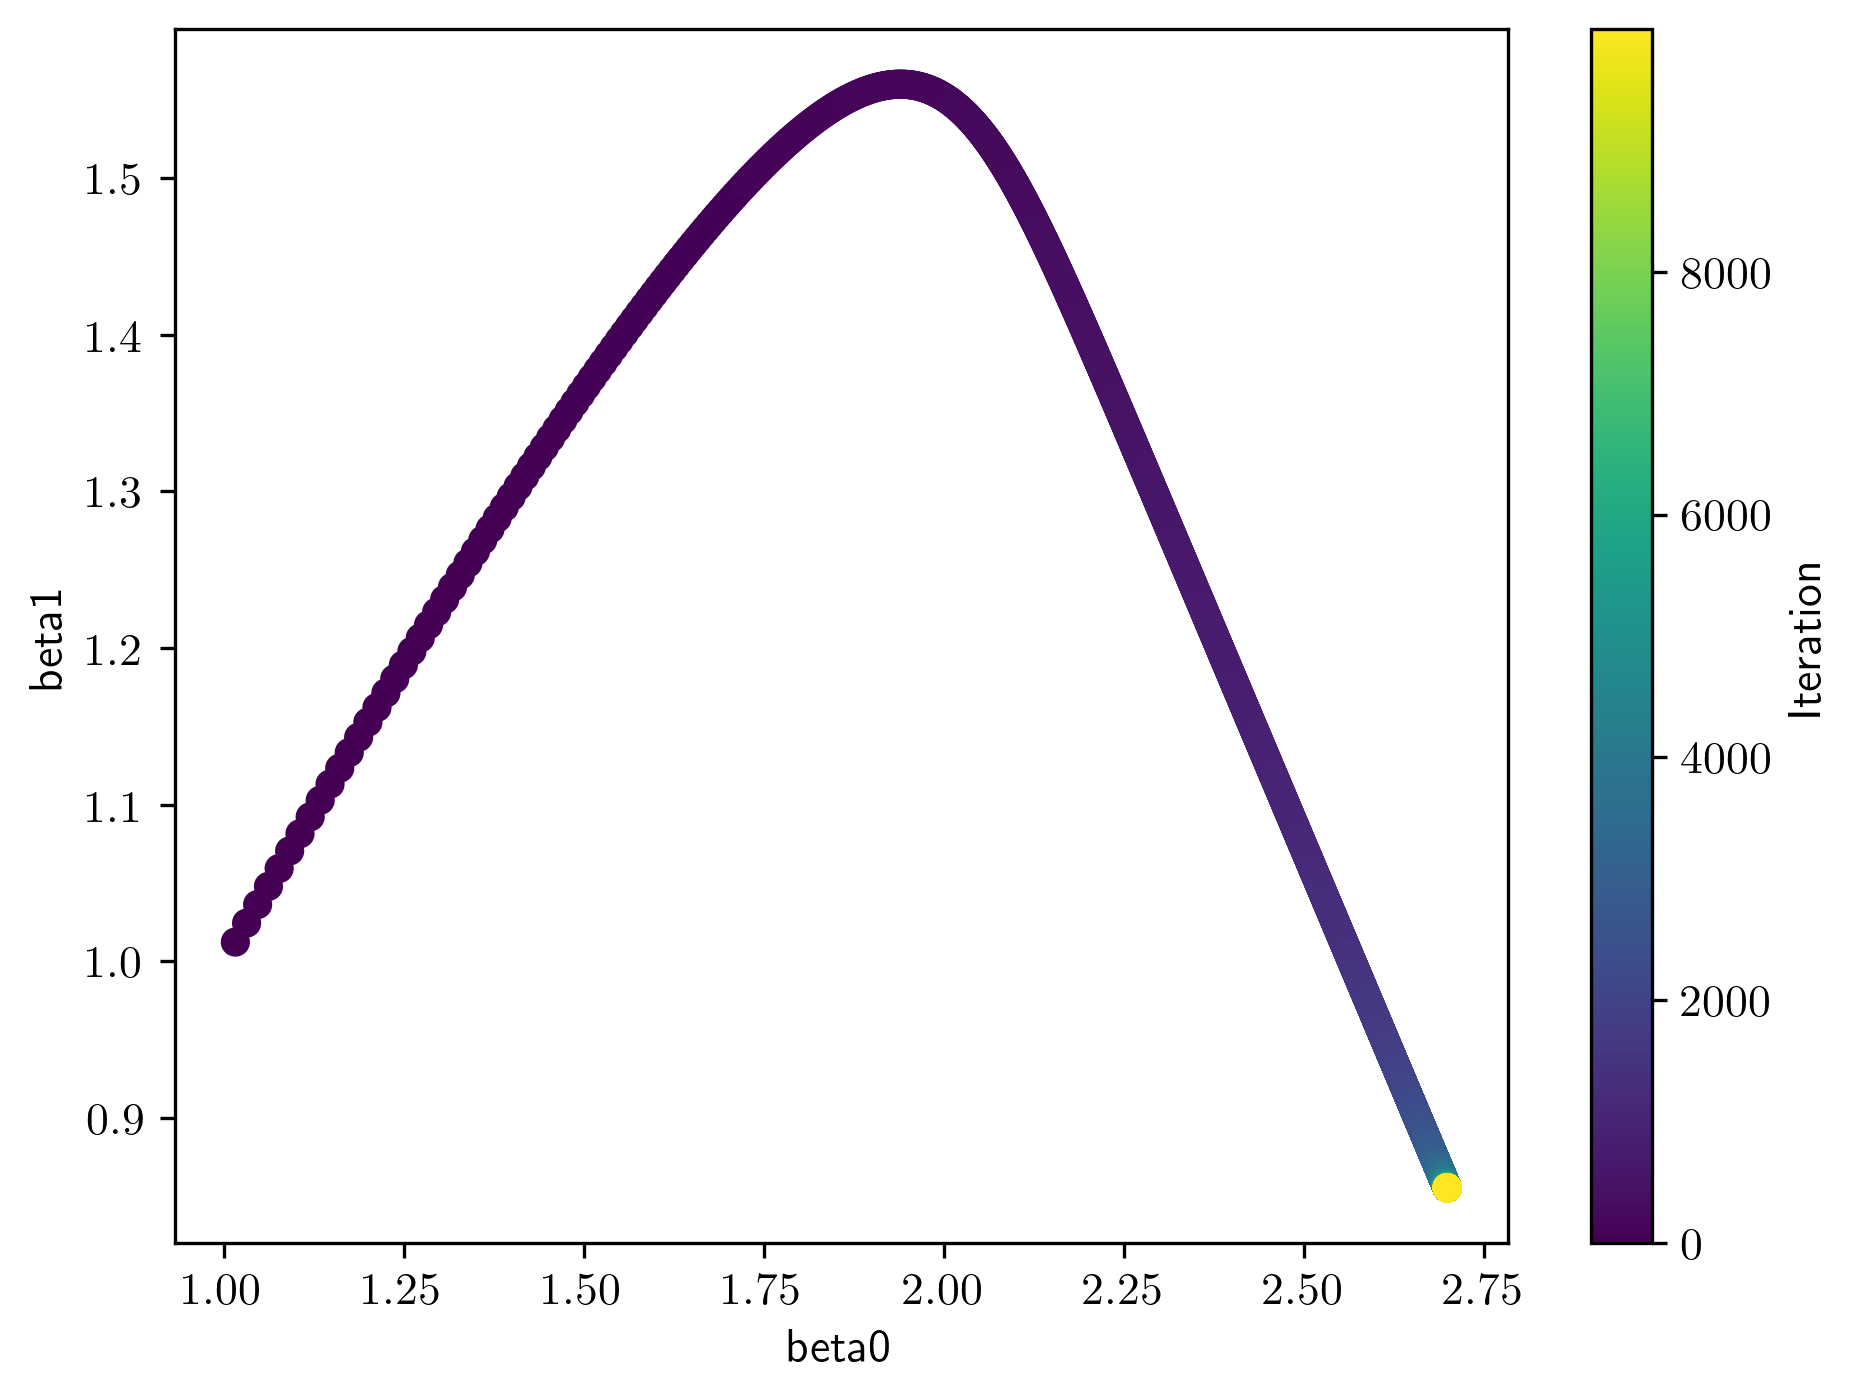

In [21]:
plt.scatter(params[:,0], params[:,1], c=range(10000))
plt.xlabel('beta0')
plt.ylabel('beta1')
plt.colorbar(label="Iteration")
plt.show()

In [22]:
# loading data - do not change this
import pandas as pd
data = pd.read_csv('diamonds.csv')
data['Intercept'] = 1.0
data['log10(price)'] = np.log10(data['price'])
X = data[['Intercept', 'carat']]
y = data['log10(price)']

In [23]:
# mse function
def mse(beta):
    return np.mean((y - X.dot(beta))**2) 

gamma = 0.01 # step size
k = 2 # number of parameters
beta = np.ones(k) # initial parameter values

# gradient descent loop
for i in range(2000):
    gradient = np.zeros(k) 
    # we need to fill out this vector grd with numerically approximated gradient
    
    for j in range(k):
        h = np.zeros(k)
        h[j] = 0.01
        gradient[j] = (mse(beta + h) - mse(beta - h))/0.02
    
    # parameter update using gradient descent - do not change code below
    beta = beta - gamma * gradient

print("beta", beta)

beta [2.69445593 0.86057335]


In [24]:
# analytical solution - to compare against it
np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

array([2.69914932, 0.85545464])

In [25]:
import numpy as np

def softmax(u):
    u_max = np.max(u)  # numerical stability
    exp_u = np.exp(u - u_max)
    return exp_u / np.sum(exp_u)

# example: utility scores for 3 choices
u = np.array([1.2, -0.7, 2.5])
probs = softmax(u)
print("Softmax probabilities:", probs)

y = 0  # true class index (first option was selected)
ce = -np.log(probs[y])  # cross-entropy loss = -log predicted prob of true class
print("Cross-entropy:", ce)

Softmax probabilities: [0.20751773 0.03103814 0.76144413]
Cross-entropy: 1.5725384826797602


In [29]:
import pandas as pd
data = pd.read_parquet("./arena-explorer-preference-100k.parquet")

# alternatively, read directly from the url
# url = ("https://huggingface.co/datasets/lmarena-ai/"
#         "arena-human-preference-100k/resolve/main/"
#         "data/arena-explorer-preference-100k.parquet"
#         )
# data = pd.read_parquet(url)

data = data[['model_a', 'model_b', 'winner']] # keeping just three columns
data.head()

,model_a,model_b,winner
0,claude-3-5-sonnet-20240620,gpt-3.5-turbo-0125,tie (bothbad)
1,mistral-large-2407,athene-70b-0725,model_b
2,claude-3-opus-20240229,gemini-1.5-flash-api-0514,tie (bothbad)
3,gemma-2-9b-it,qwen2-72b-instruct,model_b
4,mixtral-8x22b-instruct-v0.1,llama-3.1-70b-instruct,tie (bothbad)


In [30]:
data['winner'].unique().tolist()

['tie (bothbad)', 'model_b', 'model_a', 'tie']

In [31]:
# remove ties
data = data[~data['winner'].str.contains('tie')].reset_index(drop=True)
data['winner'].unique().tolist()

['model_b', 'model_a']

Distinct LLM models appearing in the data, in the alphabetic order:\index{ordering!alphabetic}

In [32]:
model_names = sorted(data[['model_a', 'model_b']].stack().unique().tolist())

A basic data set description:

In [33]:
n = data.shape[0]  
m = len(model_names)

print("Number of comparisons:", n)
print("Number of LLMs:", m)

Number of comparisons: 65418
Number of LLMs: 55


In [34]:
# sort LLM names within each comparison pair alphabetically
pairs = data.apply(lambda row: 
  tuple(sorted([row['model_a'], row['model_b']])), axis=1)
# count the number of unique LLM pairs in the data
n_pairs = len(pairs.unique())
# divide by the number of possible unique pairs (m choose 2)
coverage = n_pairs / (m*(m-1)/2)
print('Proportion of possible LLM pairs observed:', coverage)

Proportion of possible LLM pairs observed: 0.8134680134680135


In [35]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(data[['model_a', 'model_b']].values)
is_connected = nx.is_connected(G)
print("Is the comparison graph connected?", is_connected)

Is the comparison graph connected? True


 True


In [36]:
m2i = {m:i for i,m in enumerate(model_names)}
data['model_a_ind'] = data['model_a'].map(m2i)
data['model_b_ind'] = data['model_b'].map(m2i)

In [37]:
u_init = np.ones(m)   

In [38]:
def nLL(u, data):
    total_log_p = 0
    for i in range(data.shape[0]): # for each comparison
        w = data['winner'].iloc[i]
        m_a = data['model_a_ind'].iloc[i]
        m_b = data['model_b_ind'].iloc[i]
        if w == 'model_a':
            delta = u[m_a] - u[m_b]
        else:
            delta = u[m_b] - u[m_a]
        total_log_p += -np.log(1 + np.exp(-delta))
    return -total_log_p + np.sum(u**2) # -LL + regularization 

nLL(u_init, data)

np.float64(45399.30225780515)

In [39]:
def nLLv(u, data):
    # difference u[m_a] - u[m_b] across rows
    delta = u[data['model_a_ind'].values] - u[data['model_b_ind'].values]
    # invert the sign if b won over a in a given comparison
    delta *= 2 * (data['winner'] == 'model_a') - 1
    # as before
    log_p = - np.log(1 + np.exp(-delta))
    return -np.sum(log_p) + np.sum(u**2)

nLLv(u_init, data)

np.float64(45399.3022578705)

In [40]:
from scipy.optimize import minimize
import time

start_time = time.time()
res = minimize(nLLv, u_init, args=(data), method="L-BFGS-B", tol=0.00001)
exec_time = time.time() - start_time

print("Finished in %s seconds" % (round(exec_time,2)))
print("First 4 u_j values:", res.x[:4])
print("Loss (-LL+reg):", res.fun)

Finished in 9.73 seconds
First 4 u_j values: [ 0.57818263  1.17442231  0.7377621  -0.13939877]
Loss (-LL+reg): 41913.54541939752


In [41]:
#| output: false

import cvxpy as cp

def conv_tournament(data):
    u = cp.Variable(m) # LLM params
    delta = u[data['model_a_ind'].values] - u[data['model_b_ind'].values]
    delta = cp.multiply(2 * (data['winner'] == 'model_a') - 1, delta) 
    log_p = -cp.logistic(-delta) 
    objective = cp.Minimize(-cp.sum(log_p) + cp.sum_squares(u))
    problem = cp.Problem(objective)
    problem.solve(cp.CLARABEL, max_iter=5) # specific solver settings, 5 iterations are enough here and save time, but the default 50 should be used for more general problems
    return u.value, problem.value

start_time = time.time()
u_opt, loss_opt = conv_tournament(data)
exec_time = time.time() - start_time

/opt/anaconda3/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [42]:
print("Finished in %s seconds" % (round(exec_time,2)))
print("First 4 u_j values:", u_opt[:4])
print("Loss (-LL+reg):", loss_opt)

Finished in 1.58 seconds
First 4 u_j values: [ 0.55954551  1.15973313  0.71777079 -0.16122639]
Loss (-LL+reg): 41912.093227506164


In [43]:
# bootstrap
np.random.seed(999)

start_time = time.time()
results = []
# number of bootstrap samples (1000+ is often recommended)
for i in range(100):
    d = data.sample(data.shape[0], replace=True) 
    u_opt, _ = conv_tournament(d) # optimal u on d
    results.append(u_opt)

results = np.vstack(results) # to array
exec_time = time.time() - start_time

/opt/anaconda3/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/cvxpy/problems/probl

/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


/opt/anaconda3/envs/python2llmsenv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [44]:
print("Finished in %s minutes" % (round(exec_time/60,2)))
print("(num. samples, num. LLMs):", results.shape)

Finished in 2.68 minutes
(num. samples, num. LLMs): (100, 55)


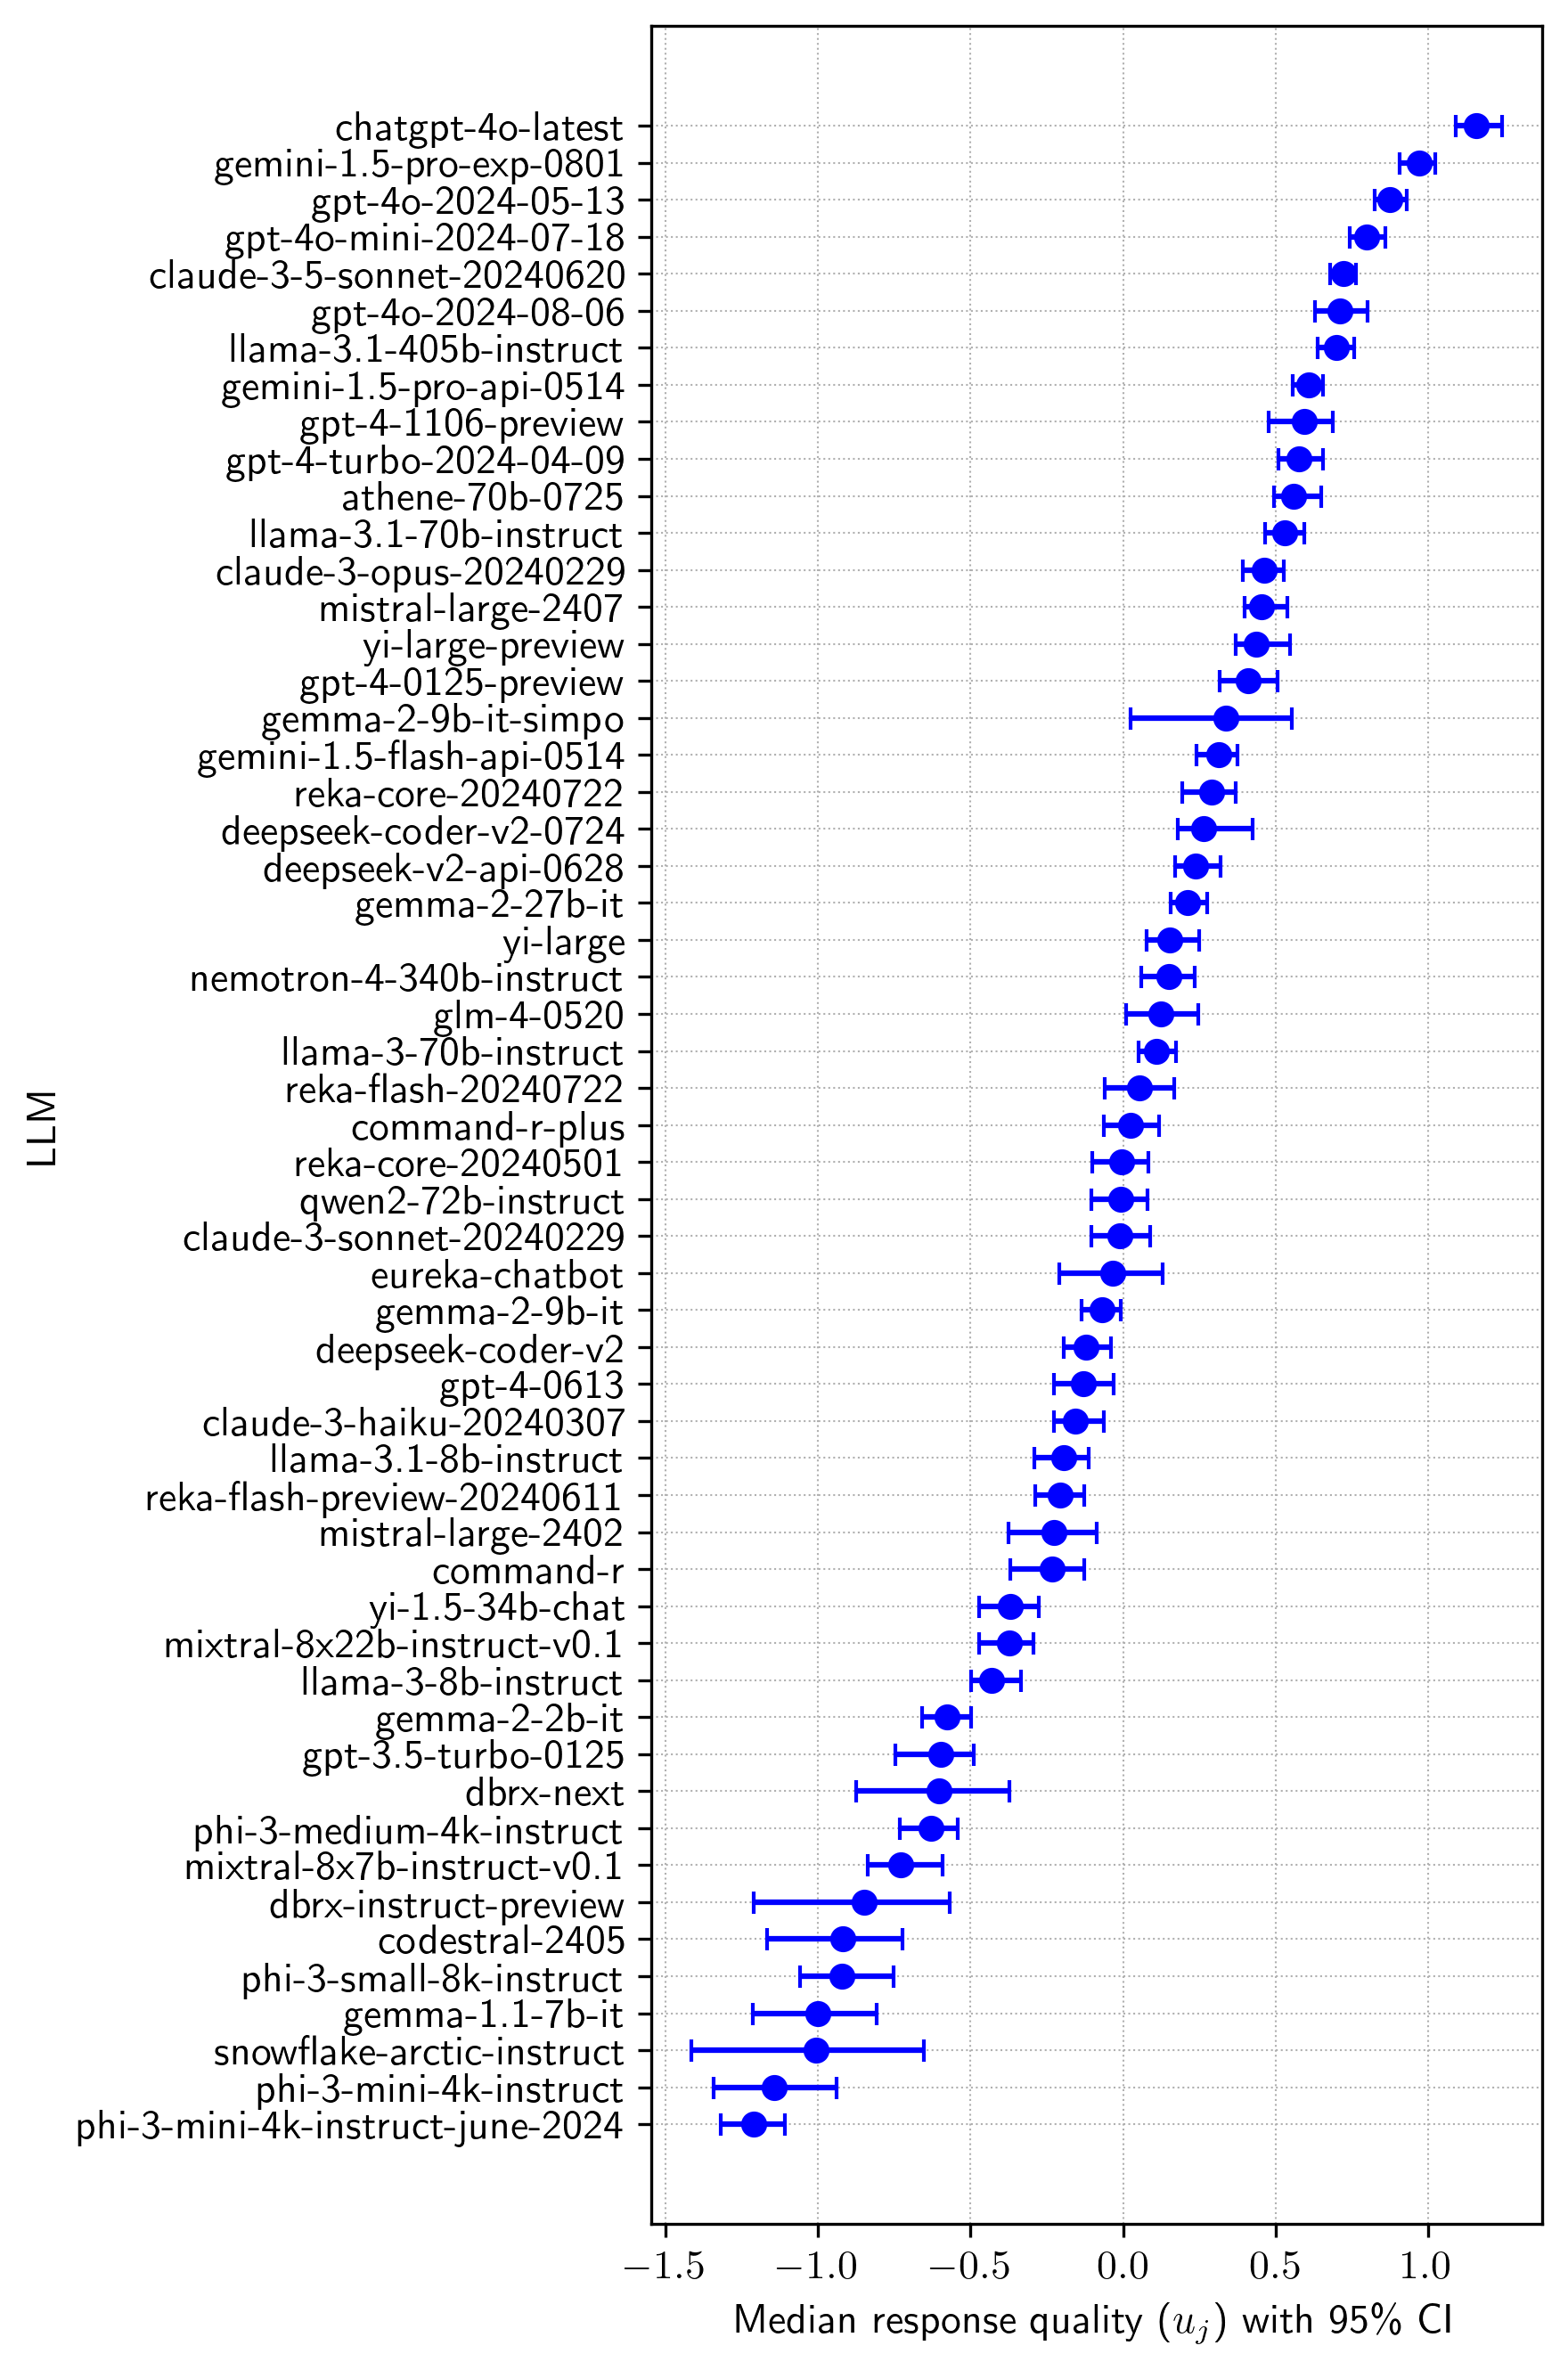

In [45]:
# percentiles of the utility estimates per LLM across bootstrap samples
u_median = np.median(results, 0)
u_2_5 = np.percentile(results, 2.5, axis=0)     
u_97_5 = np.percentile(results, 97.5, axis=0)     
# error bars (for plotting)
lower_err = u_median - u_2_5
upper_err = u_97_5 - u_median
error_bars = np.array([lower_err, upper_err])

# plotting
sort_ind = np.argsort(u_median) # sort index
plt.figure(figsize=(6, 9))
plt.errorbar(u_median[sort_ind], 
        np.array(model_names)[sort_ind], 
        xerr=error_bars[:, sort_ind],
        fmt='o', color = "blue", 
        ecolor="blue", capsize=3)
plt.xlabel(r'Median response quality ($u_j$) with 95\% CI')
plt.ylabel('LLM')
plt.grid(True, linestyle=':', linewidth=0.5)
plt.savefig("bootstrap.png")
plt.show()
plt.close()

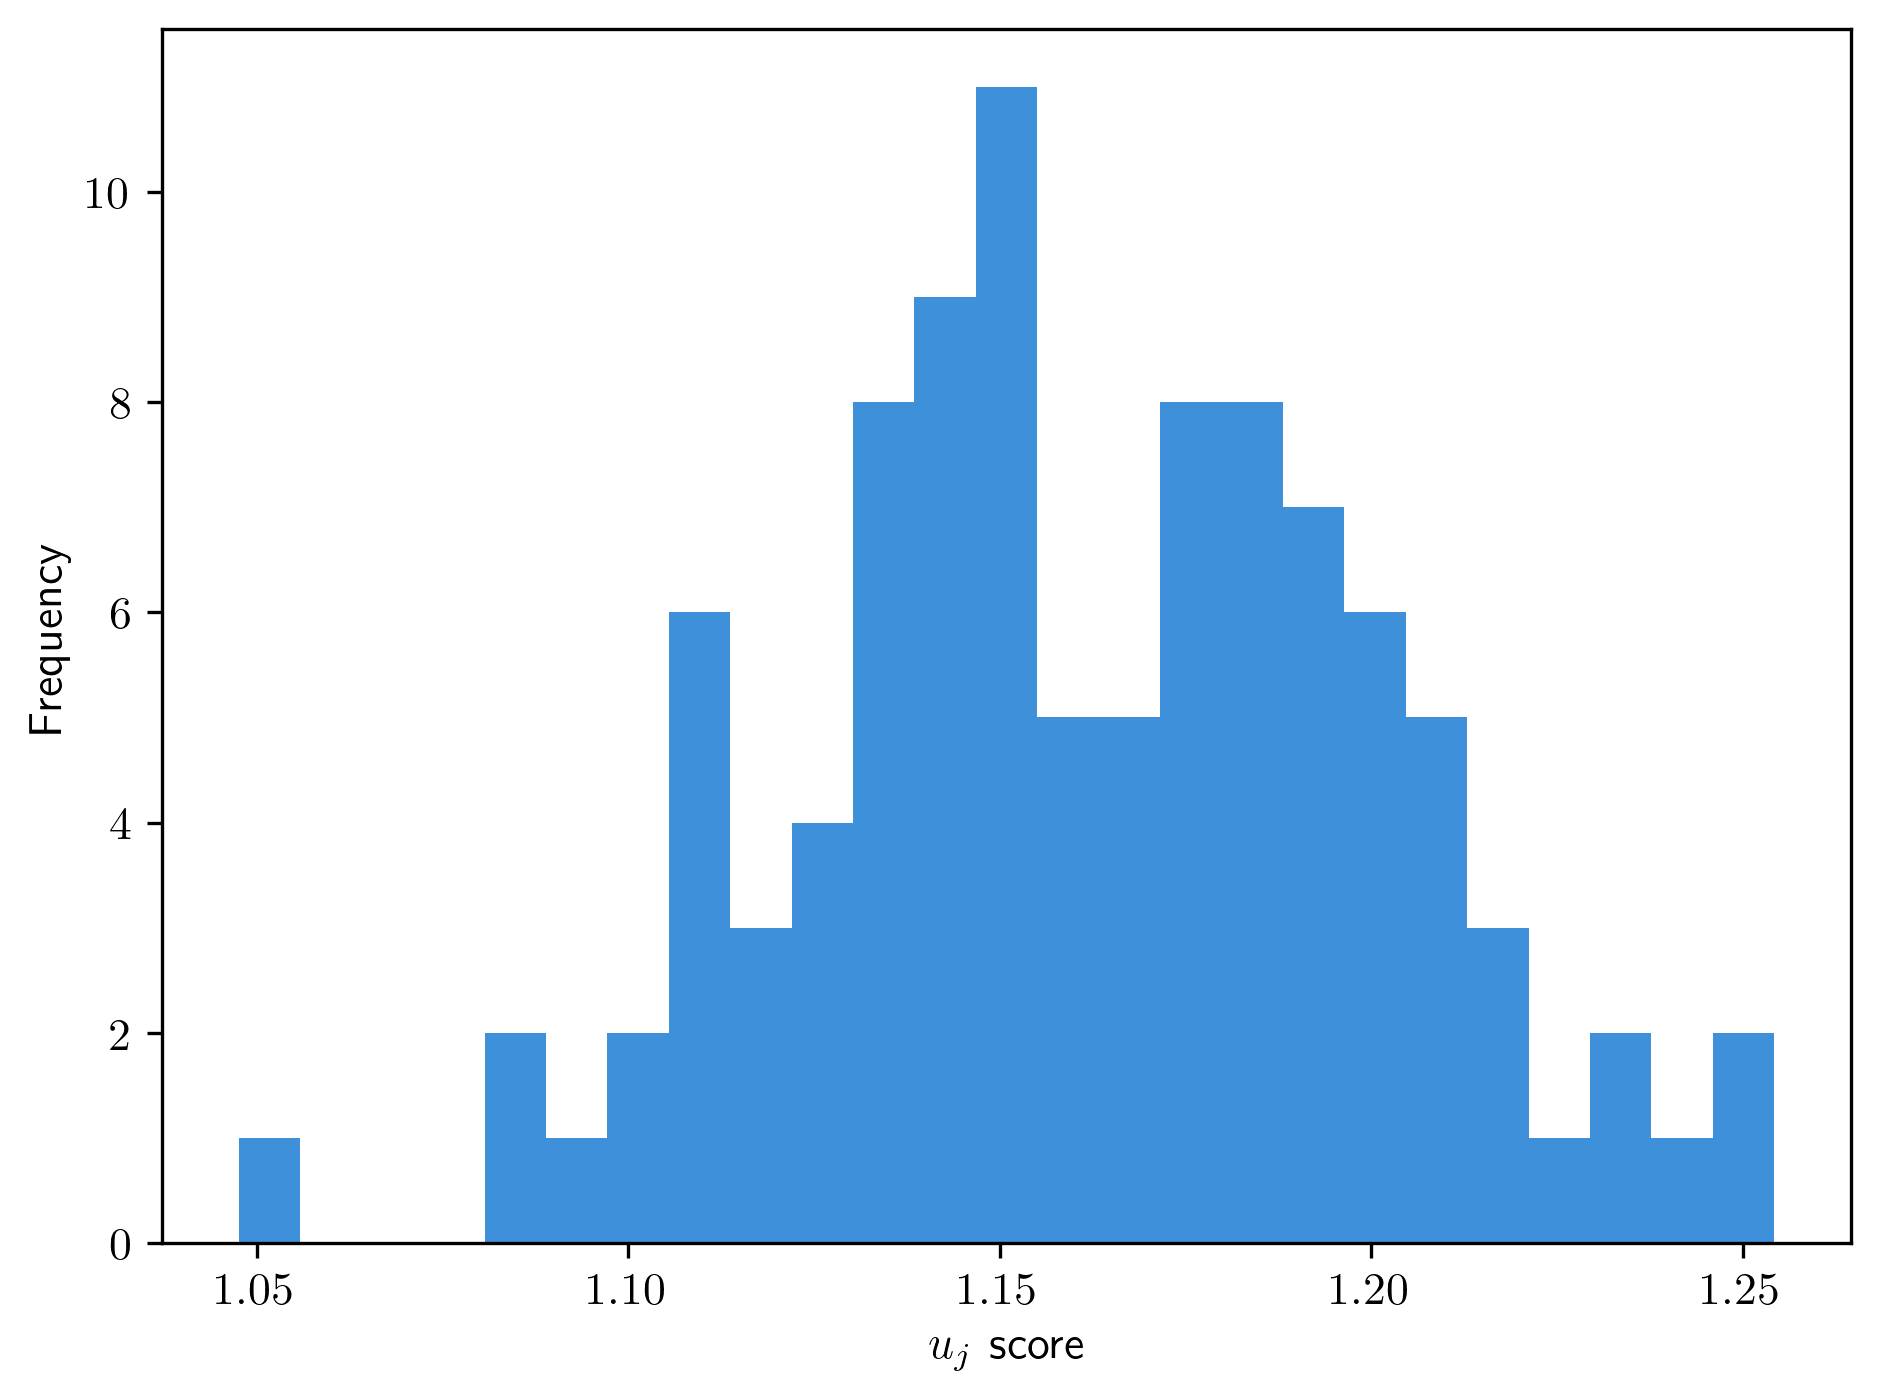

In [46]:
plt.hist(results[:,m2i["chatgpt-4o-latest"]], bins=25)
plt.xlabel("$u_j$ score")
plt.ylabel("Frequency")
plt.show()
plt.close()

In [47]:
delta = u_median[m2i["chatgpt-4o-latest"]] - u_median[m2i["gemini-1.5-pro-exp-0801"]]
p = np.exp(delta) / (np.exp(delta) + 1)
print("P(chatgpt-4o-latest > gemini-1.5-pro-exp-0801) =", 
  round(p,2))

P(chatgpt-4o-latest > gemini-1.5-pro-exp-0801) = 0.55


In [48]:
delta = u_median[m2i["chatgpt-4o-latest"]] - u_median[m2i["llama-3.1-405b-instruct"]]
p = np.exp(delta) / (np.exp(delta) + 1)
print("P(chatgpt-4o-latest > llama-3.1-405b-instruct) =", 
  round(p,2))

P(chatgpt-4o-latest > llama-3.1-405b-instruct) = 0.61
